In [15]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Input
from keras.utils import to_categorical
from keras.optimizers import SGD
import matplotlib.pyplot as plt


In [16]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# Convert labels to categorical data
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [17]:
# Setting parameters for Stochastic Gradient Descent (SGD) with Backpropagation Training of Multi-Layer Perceptron (MLP):
minibatch_size = 64  # Mini-batch size for SGD
learning_rate = 0.01  # Learning rate for SGD
momentum = 0.09  # Momentum for SGD
max_epochs = 50  # Maximum number of epochs before stopping training

model = Sequential([
    Input(shape=(train_images.shape[1],)),

    Dense(30, activation='relu'),
    BatchNormalization(),

    Dense(30, activation='relu'),
    BatchNormalization(),

    Dense(30, activation='relu'),
    BatchNormalization(),

    Dense(10, activation='softmax')
])

# Use SGD with momentum
optimizer = SGD(learning_rate, momentum)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                23550     
                                                                 
 batch_normalization_9 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 30)                930       
                                                                 
 batch_normalization_10 (Bat  (None, 30)               120       
 chNormalization)                                                
                                                                 
 dense_14 (Dense)            (None, 30)                930       
                                                                 
 batch_normalization_11 (Bat  (None, 30)              

In [18]:
history = model.fit(train_images, train_labels, epochs=max_epochs, batch_size=minibatch_size,
                    validation_data=(test_images, test_labels))


Epoch 1/50
938/938 [==============================] - 3s 2ms/step - loss: 0.5859 - accuracy: 0.8370 - val_loss: 0.2890 - val_accuracy: 0.9213
Epoch 2/50
938/938 [==============================] - 2s 2ms/step - loss: 0.2882 - accuracy: 0.9183 - val_loss: 0.2188 - val_accuracy: 0.9347
Epoch 3/50
938/938 [==============================] - 2s 2ms/step - loss: 0.2312 - accuracy: 0.9344 - val_loss: 0.1866 - val_accuracy: 0.9441
Epoch 4/50
938/938 [==============================] - 2s 2ms/step - loss: 0.2025 - accuracy: 0.9413 - val_loss: 0.1659 - val_accuracy: 0.9502
Epoch 5/50
938/938 [==============================] - 2s 2ms/step - loss: 0.1830 - accuracy: 0.9464 - val_loss: 0.1626 - val_accuracy: 0.9495
Epoch 6/50
938/938 [==============================] - 2s 2ms/step - loss: 0.1678 - accuracy: 0.9503 - val_loss: 0.1527 - val_accuracy: 0.9529
Epoch 7/50
938/938 [==============================] - 2s 2ms/step - loss: 0.1561 - accuracy: 0.9541 - val_loss: 0.1457 - val_accuracy: 0.9574
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


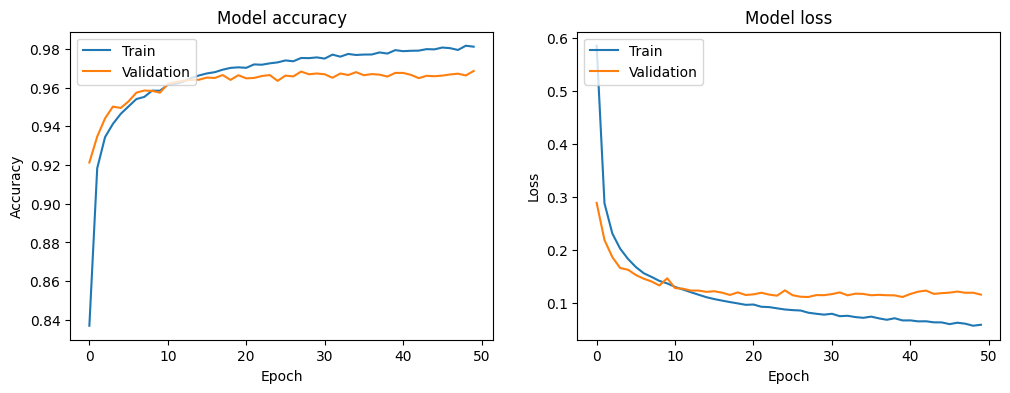

In [19]:
# List all data in history
print(model.history.history.keys())

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()